In [106]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as pyascii
import pandas as pd
import sys
import astropy.io.fits as fits
import os
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
from functions import *

#location of the calibrated spectrum of the companion
loc = '/Users/rasen/Documents/PostPhD/beast_HIP_79098/GNIRS-data2/hip79098ABb_final/calspec_hip79098ABb_orders123.dat'
indiv_obj = '2MASS J2038-4118' #change to name of individual object to fit and plot if desired
only_young = 0 #change to 1 if only a comparison to young objects is desired

In [107]:
#Read names, spectral types and URLS to download fits files
df = pd.read_csv('Montreal_Spectral_Library.csv', sep = ";")
n_mont = df['Name']
y_mont = df['Young?']
st_mont = df['SpT']
url_mont = df['URL']

In [108]:
#Clean the spectral type and gravity index 
#I've already removed from the list binaries and those with an uncertain ST
st_mont = [i.lstrip('< ') for i in st_mont] #assume latest st
st_clean = [i.split(' ') for i in st_mont] # [st, grav, smthg else]
st = [i[0].replace(':', '') for i in st_clean]
grav = [i[1] if len(i) > 1 else 'old' for i in st_clean]
grav_str = ['beta', 'gamma', 'delta']
grav = [i if i in grav_str else '--' for i in grav]


In [109]:
#read the calibrated spectrum of the companion
dummy = pyascii.read(loc, data_start =2)
names=dummy.colnames
spec_wvl = np.array(dummy[names[0]])
spec_flx = np.array(dummy[names[1]]) #erg/s/cm2/micron 
#spec_eflx = np.array(dummy[names[2]])/1e3
spec_eflx = 0.05*spec_flx


spec_flx_j = np.array([spec_flx[i] for i in np.arange(len(spec_wvl)) if 1.15 < spec_wvl[i] < 1.35  ])
spec_flx_h = np.array([spec_flx[i] for i in np.arange(len(spec_wvl)) if 1.45 < spec_wvl[i] < 1.8  ])
spec_flx_k = np.array([spec_flx[i] for i in np.arange(len(spec_wvl)) if  spec_wvl[i] >2.  ])

spec_eflx_j = np.array([spec_eflx[i] for i in np.arange(len(spec_wvl)) if 1.15 < spec_wvl[i] < 1.35  ])
spec_eflx_h = np.array([spec_eflx[i] for i in np.arange(len(spec_wvl)) if 1.45 < spec_wvl[i] < 1.8  ])
spec_eflx_k = np.array([spec_eflx[i] for i in np.arange(len(spec_wvl)) if  spec_wvl[i] >2.  ])

spec_wvl_j = np.array([spec_wvl[i] for i in np.arange(len(spec_wvl)) if 1.15<spec_wvl[i] < 1.35 ])
spec_wvl_h = np.array([spec_wvl[i] for i in np.arange(len(spec_wvl)) if 1.45<spec_wvl[i] < 1.8 ])
spec_wvl_k = np.array([spec_wvl[i] for i in np.arange(len(spec_wvl)) if spec_wvl[i] > 2. ])

spec_flx = np.append(spec_flx_h, spec_flx_k)
spec_flx = np.append(spec_flx_j, spec_flx)
spec_eflx = np.append(spec_eflx_h, spec_eflx_k)
spec_eflx = np.append(spec_eflx_j, spec_eflx)
spec_wvl = np.append(spec_wvl_h, spec_wvl_k)
spec_wvl = np.append(spec_wvl_j, spec_wvl)

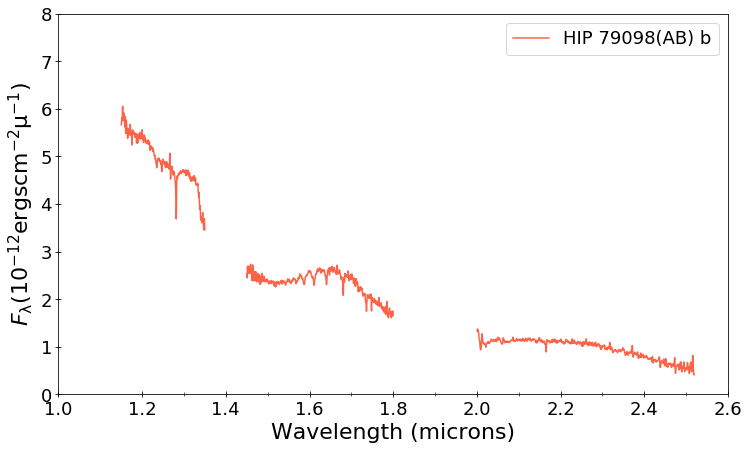

In [110]:
#Plot the calibrated spectrum of the companion
fig, ax = plt.subplots(figsize = (12, 7))
plt.xlim(1.0,2.6)
plt.ylim(0, 8)
ax.set_xlabel(r"Wavelength (microns)", fontsize=22)
ax.set_ylabel(r"$F\rm_{\lambda} (10^{-12}ergscm^{-2}\mu^{-1})$", fontsize=22)
ax.tick_params(direction='inout', length=6, labelsize=18, axis='both', which='major')
ax.set_xticks([1,1,1.3,  1.5, 1.7, 1.9, 2.1, 2.3, 2.5], minor=True)
ax.tick_params(direction='inout', length=4, labelsize=18, axis='x', which='minor')

plt.plot(spec_wvl_j,  spec_flx_j*1e12, 'tomato')
plt.plot(spec_wvl_h,  spec_flx_h*1e12, 'tomato', label = 'HIP 79098(AB) b')
plt.plot(spec_wvl_k,  spec_flx_k*1e12, 'tomato')

#plt.fill_between(spec_wvl, (spec_flx - spec_eflx ) *1e17, (spec_flx + spec_eflx ) *1e17, alpha = 1, color = 'khaki')
plt.legend(fontsize=18)
plt.show()






0
GU Psc A
1
GU Psc b
2
2MASS J1207-3900
3
2MASS J1207-3900
4
2MASS J1247-3816
5
SIMP J2154-1055
6
2MASS J0001+1535
7
2MASS J0006-6436
8
2MASS J0018-6703
9
2MASS J0019-6226
10
2MASS J0019+4614
11
2MASS J0027-0806
12
2MASS J0034-4102
13
2MASS J0038-6403
14
2MASS J0041-5621
15
2MASS J0042+1142
16
2MASS J0046+0715
17
2MASS J0051-6227
18
2MASS J0058-0651
19
2MASS J0120-5200
20
SIMP J0120+1518
21
2MASS J0126-5505
22
2MASS J0129-0823
23
2MASS J0134-5707
24
2MASS J0148-5201
25
2MASS J0153-6744
26
2MASS J0210-3015
27
2MASS J0226-5327
28
2MASS J0228+0218
29
2MASS J0240-4253
30
2MASS J0241-5511
31
2MASS J0250-0151
32
2MASS J0258-1520
33
2MASS J0259-4232
34
2MASS J0309-3014
35
2MASS J0311+0106
36
2MASS J0318-3708
37
2MASS J0322-7940
38
2MASS J0335+2342
39
2MASS J0336-2619
40
2MASS J0339-2434
41
2MASS J0342-2904
42
2MASS J0355-1032
43
SIMP J0357-1937
44
SIMP J0417+1634
45
SIMP J0417+1634
46
SIMP J0417+1634
47
2MASS J0418-4507
48
2MASS J0440-5126
49
2MASS J0440-1820
50
2MASS J0443+0002
51
2MASS J04

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


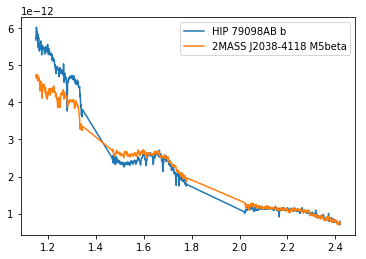

80
2MASS J2039-1126
81
2MASS J2050-3639
82
2MASS J2112-8128
83
2MASS J2154-1055
84
2MASS J2154-7459
85
2MASS J2202-5605
86
2MASS J2313-6127
87
2MASS J2314-5405
88
2MASS J2322-6151 A
89
2MASS J2322-6151 B
90
SIMP J0006-2158
91
SIMP J0008+0806
92
SIMP J0013+0841
93
2MASS J0021-4244
94
SIMP J0026-0936
95
2MASS J0046+0252
96
SIMP J0049+0440
97
SIMP J0049+0440
98
SIMP J0102+0355
99
SIMP J0103+1940
100
SIMP J0151+3824
101
SIMP J0155+0950
102
SIMP J0155+0950
103
SIMP J0211-1427
104
2MASS J0244-3548
105
SIMP J0251-0818
106
2MASS J0253-7959
107
2MASS J0300-5459
108
SIMP J0307+0852
109
2MASS J0314+1603
110
SIMP J0316+2650
111
2MASS J0320-3313
112
2MASS J0326-0617
113
SIMP J0331+1944
114
2MASS J0333-3215
115
2MASS J0453-1751
116
SIMP J0414+1529
117
SIMP J0417-1345
118
SIMP J0417-1838
119
SIMP J0418+1121
120
SIMP J0421-1950
121
SIMP J0421-1133
122
SIMP J0422+0723
123
SIMP J0422+1033
124
SIMP J0422+1033
125
SIMP J0423+1212
126
SIMP J0425-1900
127
SIMP J0429+0607
128
SIMP J0429+0607
129
SIMP J0430+1

In [115]:
#Loop through montreal objects and fit to the spectrum of the companion
name_ind=-1
Results_chisq = dict()

for name in n_mont: 
    name_ind+=1
    print(name_ind)
    print(name)
    
    #if name_ind > 30: sys.exit()
    if indiv_obj != 0:
        if name != indiv_obj: continue
    
    if only_young == 1 and y_mont[name_ind] != 'Y': 
        print(name + " SKIPPED because not young")
        continue #if keyword = 'Y', read only the young ones
    
    #########   READ THE MONTREAL OBJECT
    #########
    mont = fits.open(url_mont[name_ind], mode='readonly')[0].data
    mont_wvl = mont[0] ; mont_flx = mont[1]; mont_eflx = mont[2]
    ST_mont = st[name_ind] ; thisgrav = grav[name_ind]

    #Get rid of the region affected by tellurics
    without_tell_jh = np.logical_or(mont_wvl <1.35, mont_wvl>1.45)
    mont_flx = mont_flx[without_tell_jh] ; mont_wvl = mont_wvl[without_tell_jh]; mont_eflx = mont_eflx[without_tell_jh] 

    without_tell_hk = np.logical_or(mont_wvl <1.8, mont_wvl>2.0)
    mont_flx = mont_flx[without_tell_hk] ; mont_wvl = mont_wvl[without_tell_hk]; mont_eflx = mont_eflx[without_tell_hk] 
    
    #take only good datapoints
    good = np.logical_and(mont_flx > 0.,np.isfinite(mont_flx) == True)
    mont_flx = mont_flx[good]; mont_eflx = mont_eflx[good]; mont_wvl = mont_wvl[good]
    
    #wavelenght not increasing monotonically
    if (np.any(mont_wvl[1:] <= mont_wvl[:-1])) ==True: 
        print(name + " SKIPPED because wavelength not increasing monotonically")
        continue

    #I only take those with good precision
    if np.median(mont_eflx)/np.median(mont_flx) > 0.05: 
        print(name + " SKIPPED because its precision is not good enough")
        continue 
    ##########
    ##########
    
    #Find overlapping region that will be used for the fit.
    ini = max(mont_wvl[0], spec_wvl[0])
    fin = min(mont_wvl[-1], spec_wvl[-1])
   
    overlap_obj = np.logical_and(spec_wvl>=ini, spec_wvl<=fin)
    ospec_wvl = spec_wvl[overlap_obj] ; ospec_flx = spec_flx[overlap_obj] ; ospec_eflx = spec_eflx[overlap_obj]

    overlap_mod = np.logical_and(mont_wvl>=ini, mont_wvl <=fin)
    omont_wvl = mont_wvl[overlap_mod] ; omont_flx = mont_flx[overlap_mod] ; omont_eflx = mont_eflx[overlap_mod]
    
    ####
    #Convert the empirical spectrum and the GNIRS' spectrum to the same resolution
    #Find which one has a higher resolution
    fwhm_fr = high_low_res(omont_wvl,omont_flx, omont_eflx, ospec_wvl)

    #if fwhm_fr <1, our spectrum has higher resolution, thus smooth the model 
    # Otherwise, smooth the object to the mdoel's resolution
    #To avoid confusion, we simply call all of them "smooth", but now smont_wvl and sspec_wvl are equal
    somont_wvl, somont_flx, somont_eflx, sospec_wvl, sospec_flx, sospec_eflx = \
    apply_same_res(omont_wvl, omont_flx, omont_eflx, ospec_wvl, ospec_flx, ospec_eflx, fwhm_fr)
    
    #Get Gval and C factor
    chi_sq, C_fac = G_value(sospec_flx,sospec_eflx, somont_flx)
    print(chi_sq/len(sospec_flx))
    Results_chisq[name] = ST_mont, thisgrav, chi_sq/len(sospec_flx)
    
    
    plt.figure()
    plt.plot(sospec_wvl, sospec_flx, label = 'HIP 79098AB b')
    plt.plot(sospec_wvl, somont_flx*C_fac, label = name+' ' + ST_mont + thisgrav)
    plt.legend()
    plt.show()
        
        
        

In [112]:
res = Results_chisq
info=list(res.values())
ST=[] ; chi_sq = []; grav_list = []

for i in info:
    #if '.2' in i[0] or '.7' in i[0]: ST=i[0][:2]
    #else: ST=i[0]
    ST.append(i[0])
    grav_list.append(i[1])
    chi_sq.append(i[2])

mmm = np.where(chi_sq==min(chi_sq))
minimum = mmm[0][0]
titles = list(res.keys())
best_obj = titles[minimum]
best_chi_sq = chi_sq[minimum]
best_ST = ST[minimum]
best_grav = grav_list[minimum]
print(best_ST)
print(best_obj)
print(best_chi_sq)
print(best_grav)

M5
2MASS J2038-4118
3.90507615425
beta


[ 0.91059422  0.91124278  0.91189146 ...,  2.41812277  2.41888595
  2.41964841]


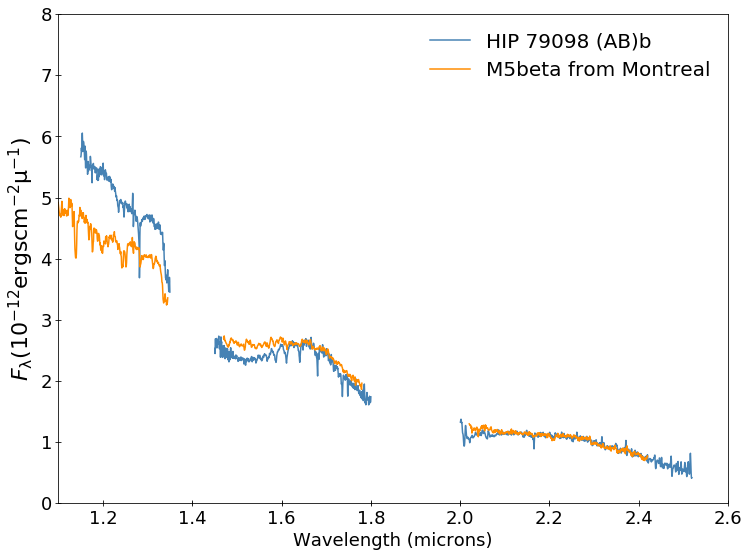

In [125]:
#Plot the individual (best?) object 
if indiv_obj !=0:
    #plot companion spectrum and empirical
    fig, ax = plt.subplots(figsize = (12, 9))
    plt.xlim(1.1,2.6)
    plt.ylim(0, 8)
    ax.set_xlabel(r"Wavelength (microns)", fontsize=18)
    ax.set_ylabel(r"$F\rm_{\lambda} (10^{-12}ergscm^{-2}\mu^{-1}$)", fontsize=22)
    ax.tick_params(direction='inout', length=6, labelsize=18, axis='both', which='major')
    ax.set_xticks([1.4,1.6,  1.8, 2.0, 2.2], minor=True)
    ax.tick_params(direction='inout', length=4, labelsize=18, axis='x', which='minor')


    #split in three the region affected by tellurics to plot
    j_spec_flx = [spec_flx[i] for i in np.arange(len(spec_flx)) if 1.35>spec_wvl[i]]
    j_spec_eflx = [spec_eflx[i] for i in np.arange(len(spec_wvl)) if 1.35>spec_wvl[i]]
    j_spec_wvl = [spec_wvl[i] for i in np.arange(len(spec_wvl)) if 1.35>spec_wvl[i]]
    j_mont_flx = [mont_flx[i] for i in np.arange(len(mont_wvl)) if 1.35>mont_wvl[i]]
    j_mont_wvl = [mont_wvl[i] for i in np.arange(len(mont_wvl)) if 1.35>mont_wvl[i]]

    f_spec_flx = [spec_flx[i] for i in np.arange(len(spec_flx)) if 1.45<spec_wvl[i]<1.8]
    f_spec_eflx = [spec_eflx[i] for i in np.arange(len(spec_wvl)) if 1.45<spec_wvl[i]<1.8]
    f_spec_wvl = [spec_wvl[i] for i in np.arange(len(spec_wvl)) if 1.45<spec_wvl[i]<1.8]
    f_mont_flx = [mont_flx[i] for i in np.arange(len(mont_wvl)) if 1.45<mont_wvl[i]<1.8]
    f_mont_wvl = [mont_wvl[i] for i in np.arange(len(mont_wvl)) if 1.45<mont_wvl[i]<1.8]

    s_spec_flx = [spec_flx[i] for i in np.arange(len(spec_flx)) if spec_wvl[i]>2.]
    s_spec_eflx = [spec_eflx[i] for i in np.arange(len(spec_wvl)) if spec_wvl[i]>2.]
    s_spec_wvl = [spec_wvl[i] for i in np.arange(len(spec_wvl)) if spec_wvl[i]>2.]
    s_mont_flx = [mont_flx[i] for i in np.arange(len(mont_wvl)) if mont_wvl[i]>2.]
    s_mont_wvl = [mont_wvl[i] for i in np.arange(len(mont_wvl)) if mont_wvl[i]>2.]


    plt.plot(j_spec_wvl, np.array(j_spec_flx)*1e12, 'steelblue')
    plt.plot(j_mont_wvl, np.array(j_mont_flx)*C_fac*1e12, 'darkorange')
  
    plt.plot(f_spec_wvl, np.array(f_spec_flx)*1e12, 'steelblue',label = 'HIP 79098 (AB)b')
    plt.plot(f_mont_wvl, np.array(f_mont_flx)*C_fac*1e12, 'darkorange',label = ST[0] + thisgrav+' from Montreal')
    #plt.fill_between(f_spec_wvl, (np.array(f_spec_flx) - np.array(f_spec_eflx) ) *1e17, \
     #               (np.array(f_spec_flx) + np.array(f_spec_eflx)) *1e17, alpha = 1, color = 'khaki')

    plt.plot(s_spec_wvl, np.array(s_spec_flx)*1e12, 'steelblue')
    plt.plot(s_mont_wvl, np.array(s_mont_flx)*C_fac*1e12, 'darkorange')
    #plt.fill_between(s_spec_wvl, (np.array(s_spec_flx) - np.array(s_spec_eflx) ) *1e17, \
    #                (np.array(s_spec_flx) + np.array(s_spec_eflx)) *1e17, alpha = 1, color = 'khaki')


    plt.legend(frameon=False, fontsize = 20)
    #plt.savefig('Bestfit_Montreal.eps', format = 'eps')
    plt.show()
